In [12]:
from codes.data_loader import load_data
from codes.alg import tpr_parity_opt
from codes.metrics import fairness_visibility, accuracy, group_fairness
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

## 2020

In [42]:
adj, y, h_c , prt_f, prt_t, W = load_data( year = 2020)
g = nx.from_numpy_array(adj)
pos = nx.spring_layout(g)
h = tpr_parity_opt(W,y,h_c,prt_f)

#### Percpetion of original Conference Decisions

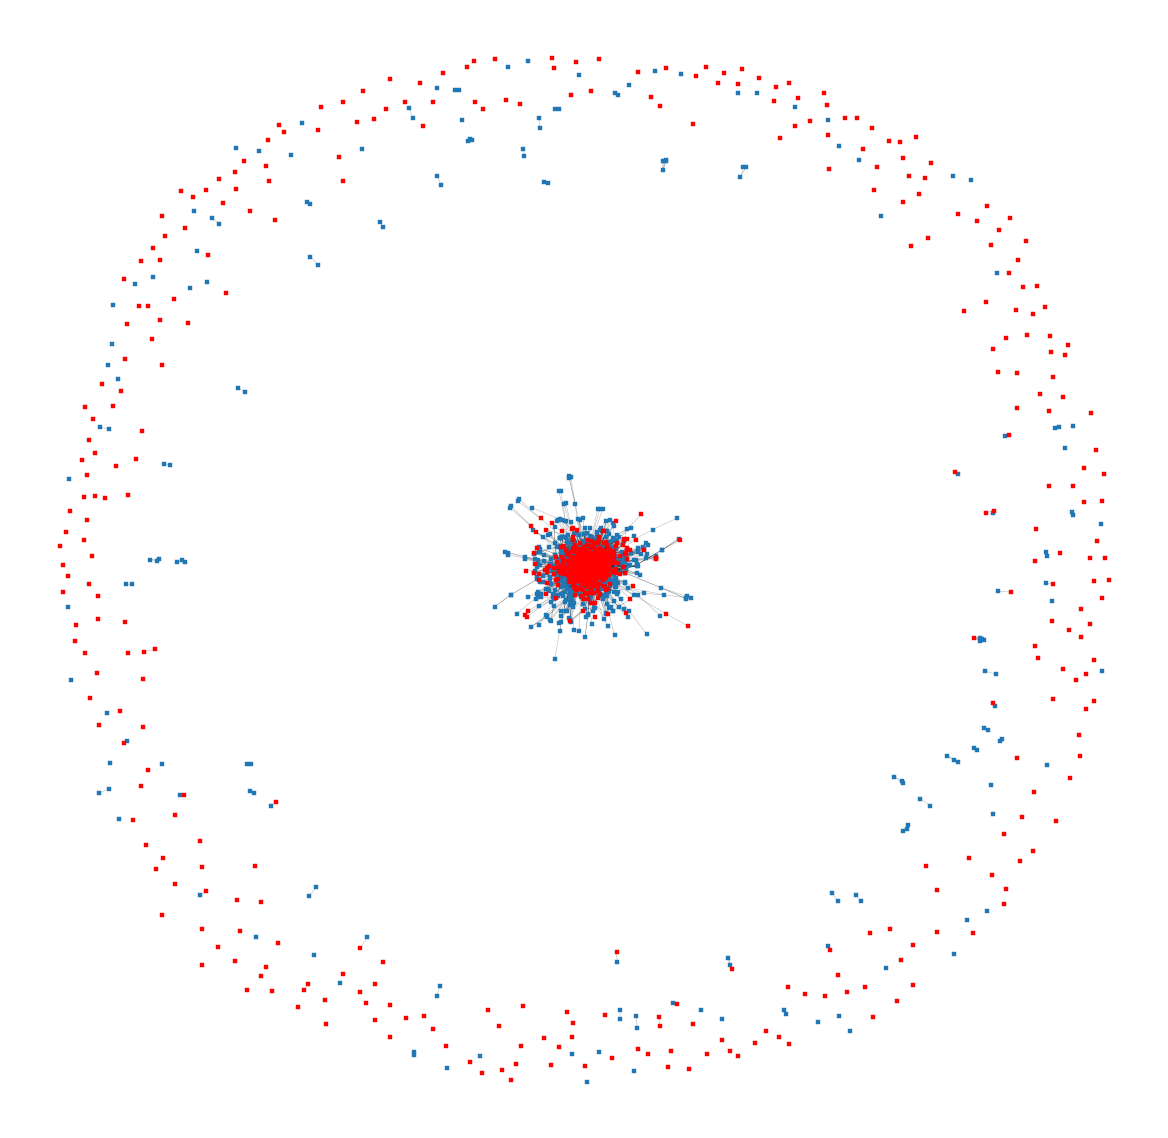

In [43]:
fig = plt.figure(num=None, figsize=(50, 50), dpi=30)
fig.clf()
ax = fig.subplots()
ax.cla()
ax.axis('off')
nx.draw_networkx_nodes(g ,pos, nodelist=list(np.where(perceptions(W ,y, h_c))[0]) ,node_shape='s', node_size=60)
nx.draw_networkx_nodes(g ,pos, nodelist=list(np.where(1-perceptions(W ,y, h_c))[0]),node_shape='s',node_color = 'r' ,node_size=60)
nx.draw_networkx_edges(g,pos, width= 0.7, alpha=0.5)
plt.show()

#### Percpetion of recommended Decisions

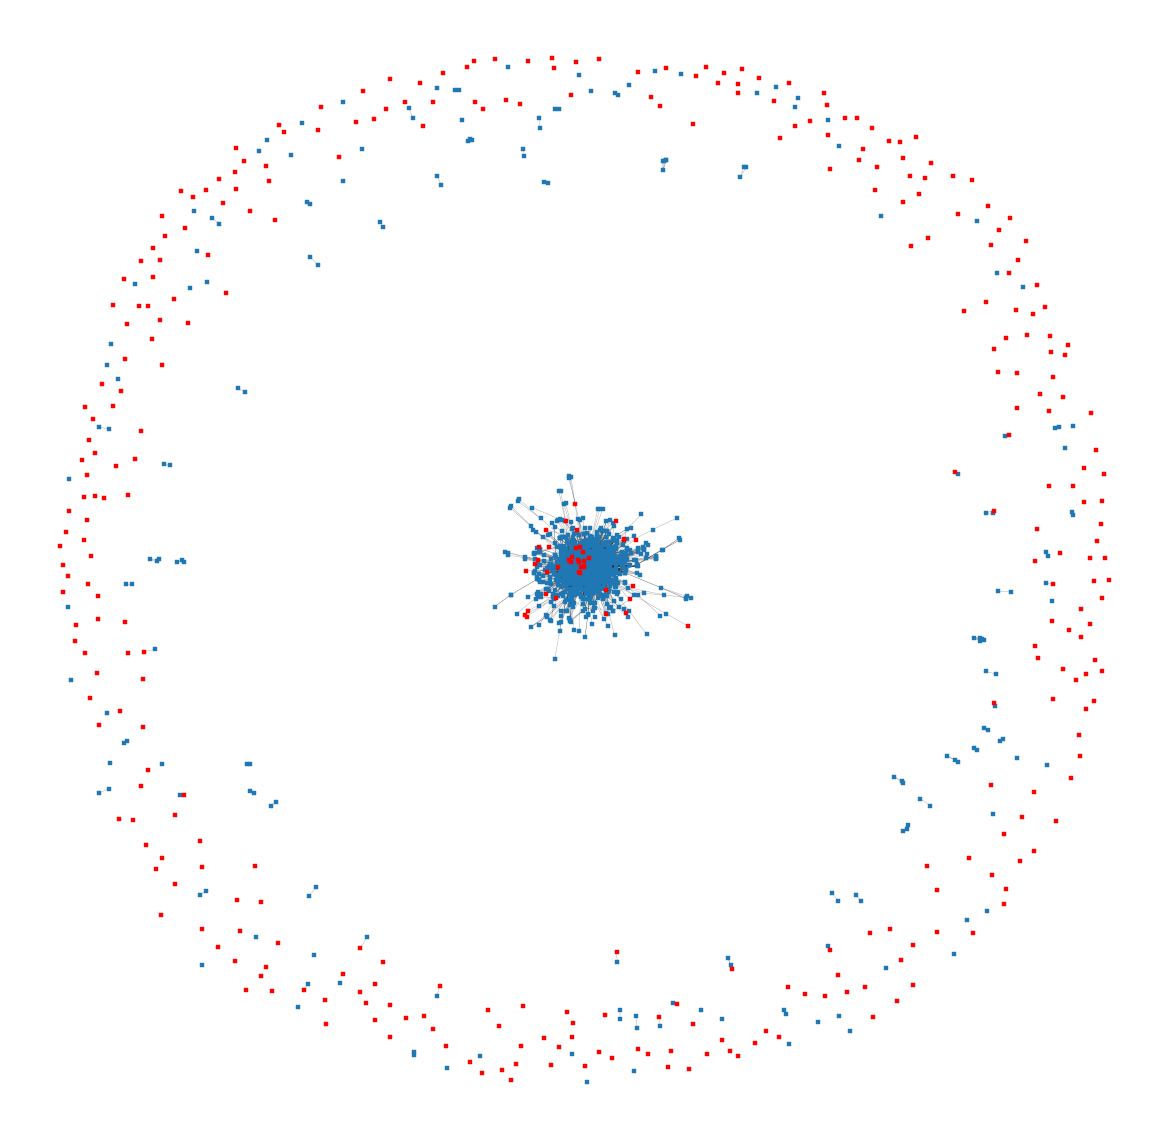

In [44]:

#pos = nx.spring_layout(g)

fig = plt.figure(num=None, figsize=(50, 50), dpi=30)
fig.clf()
ax = fig.subplots()
ax.cla()
ax.axis('off')
nx.draw_networkx_nodes(g ,pos, nodelist=list(np.where(perceptions(W ,y, h))[0]) ,node_shape='s', node_size=60)
nx.draw_networkx_nodes(g ,pos, nodelist=list(np.where(1-perceptions(W ,y, h))[0]),node_shape='s',node_color = 'r' ,node_size=60)
nx.draw_networkx_edges(g,pos, width= 0.7, alpha=0.5)
plt.show()

## 2019

In [45]:
adj, y, h_c , prt_f, prt_t, W = load_data( year = 2019)
g = nx.from_numpy_array(adj)
pos = nx.spring_layout(g)
h = tpr_parity_opt(W,y,h_c,prt_f)

#### Percpetion of original Conference Decisions

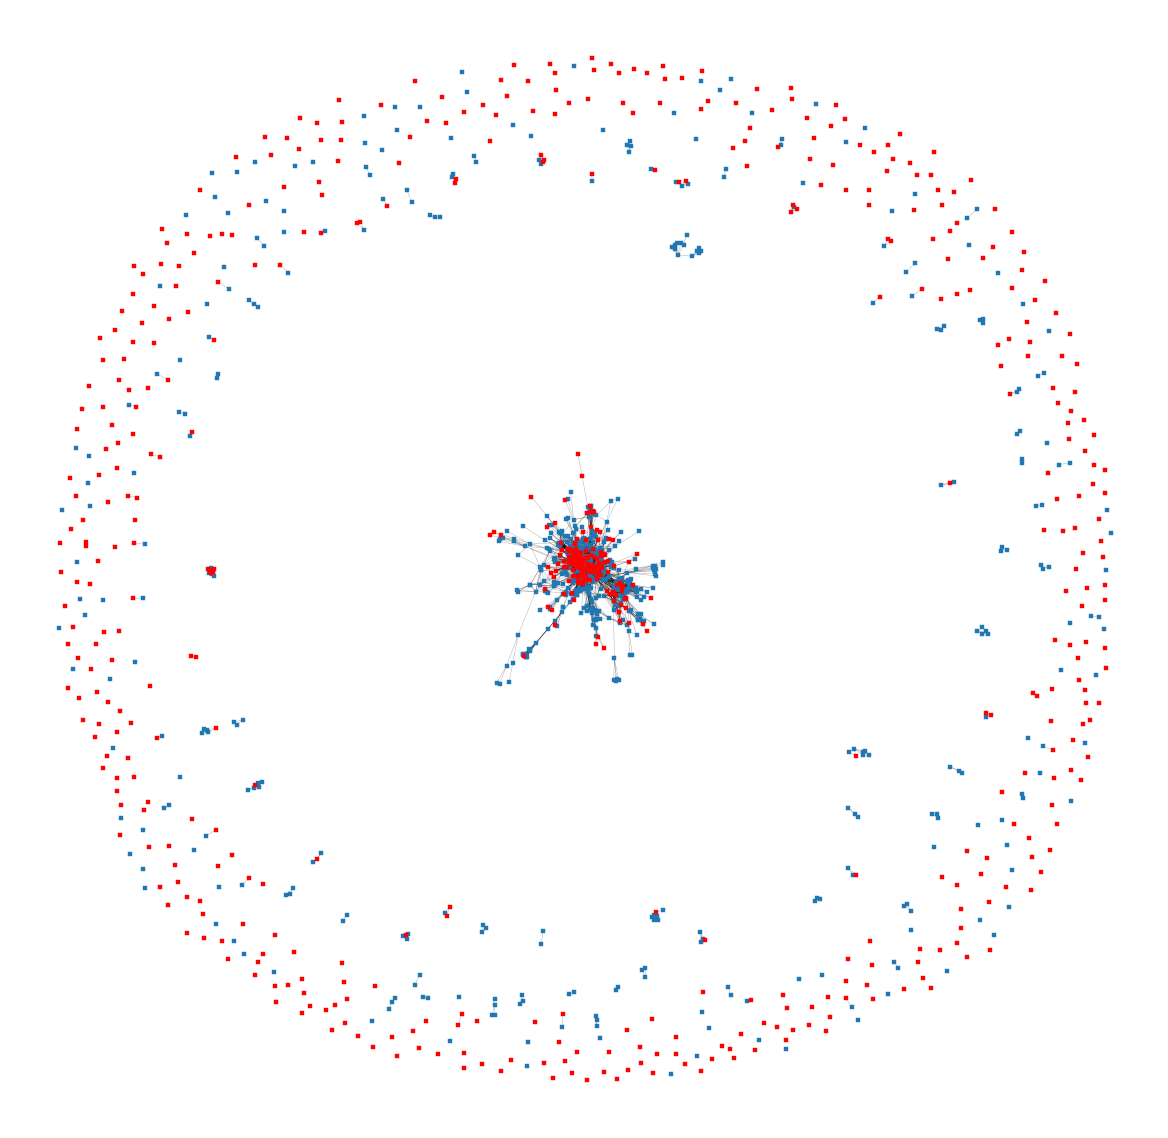

In [40]:
fig = plt.figure(num=None, figsize=(50, 50), dpi=30)
fig.clf()
ax = fig.subplots()
ax.cla()
ax.axis('off')
nx.draw_networkx_nodes(g ,pos, nodelist=list(np.where(perceptions(W ,y, h_c))[0]) ,node_shape='s', node_size=60)
nx.draw_networkx_nodes(g ,pos, nodelist=list(np.where(1-perceptions(W ,y, h_c))[0]),node_shape='s',node_color = 'r' ,node_size=60)
nx.draw_networkx_edges(g,pos, width= 0.7, alpha=0.5)
plt.show()

#### Percpetion of recommended Decisions

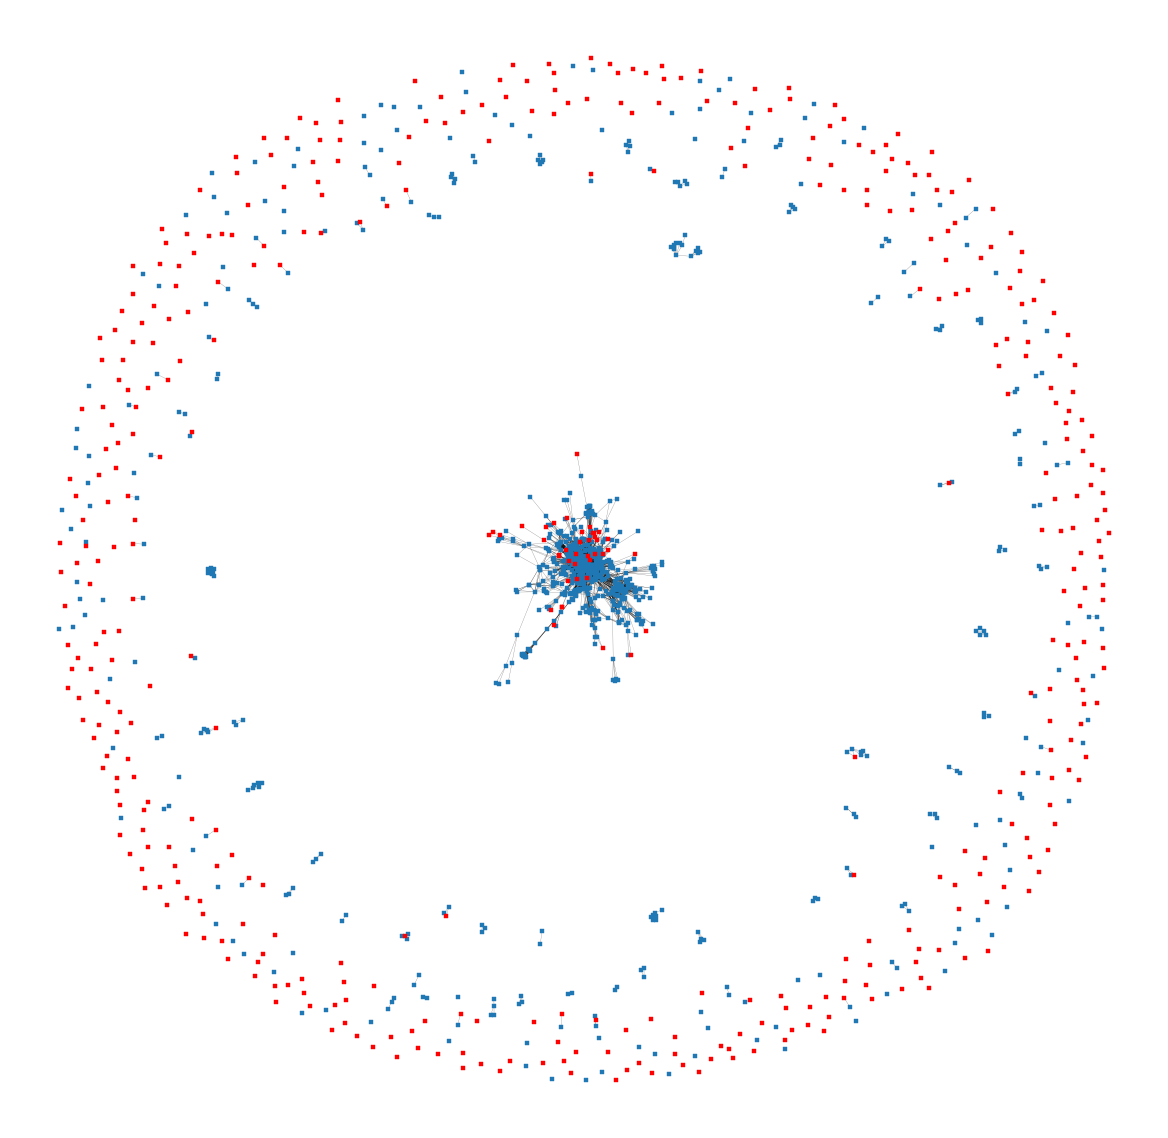

In [41]:

#pos = nx.spring_layout(g)

fig = plt.figure(num=None, figsize=(50, 50), dpi=30)
fig.clf()
ax = fig.subplots()
ax.cla()
ax.axis('off')
nx.draw_networkx_nodes(g ,pos, nodelist=list(np.where(perceptions(W ,y, h))[0]) ,node_shape='s', node_size=60)
nx.draw_networkx_nodes(g ,pos, nodelist=list(np.where(1-perceptions(W ,y, h))[0]),node_shape='s',node_color = 'r' ,node_size=60)
nx.draw_networkx_edges(g,pos, width= 0.7, alpha=0.5)
plt.show()

In [115]:
import pandas as pd
pd.Series(h_c).value_counts()

0.0    917
1.0    502
dtype: int64

In [118]:
pf2

set()

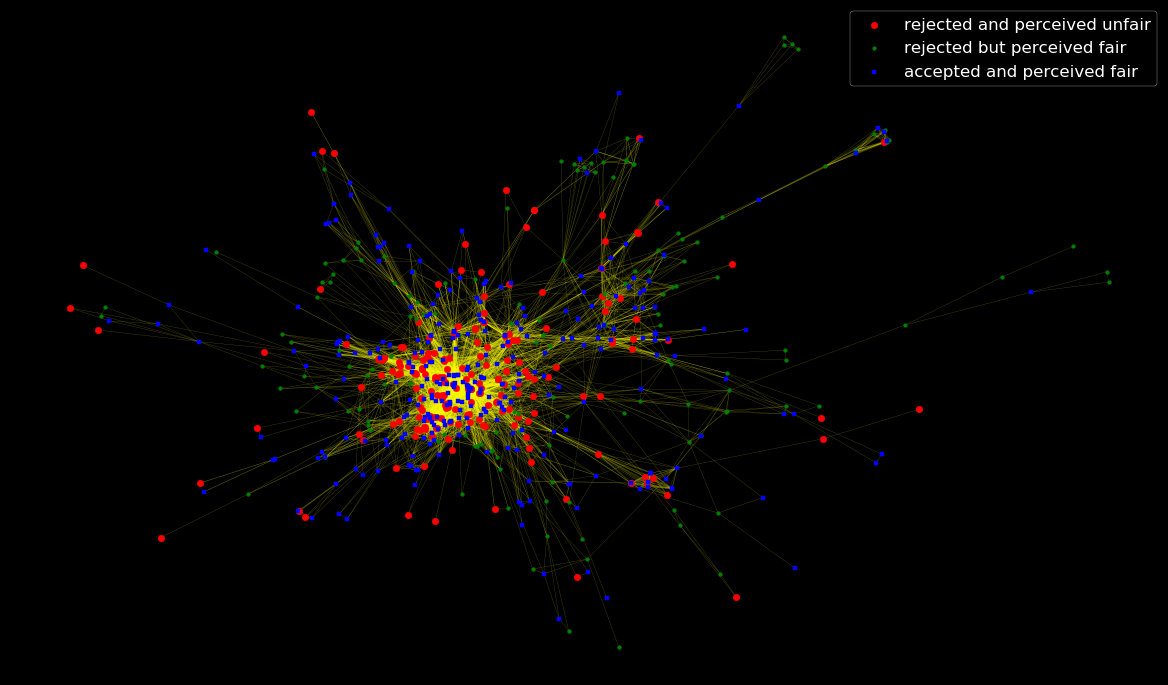

In [125]:
gc = next(nx.connected_components(g))
pf0 = set(np.where(perceptions(W ,y, h_c))[0])&set(np.where(h_c)[0]) # percived 1, h=1
pf1 = set(np.where(perceptions(W ,y, h_c))[0])&set(np.where(1-h_c)[0]) # percived 1, h=0
pf2 = set(np.where(1-perceptions(W ,y, h_c))[0])&set(np.where(h_c)[0]) # percived 0, h=1
pf3 = set(np.where(1-perceptions(W ,y, h_c))[0])&set(np.where(1-h_c)[0]) # percived 0, h=0

plt.style.use('dark_background')
fig = plt.figure(num=None, figsize=(50, 30), dpi=30)
fig.clf()

ax = fig.subplots()
ax.cla()
ax.axis('off')
nx.draw_networkx_nodes(g ,pos, nodelist=list(gc&pf3) ,node_color = 'r', node_size=250, label ='rejected and perceived unfair')
nx.draw_networkx_nodes(g ,pos, nodelist=list(gc&pf2) ,node_shape='s',node_color = 'w', node_size=80, label ='accepted but perceived unfair')
nx.draw_networkx_nodes(g ,pos, nodelist=list(gc&pf1) ,node_color = 'g', node_size=80, label ='rejected but perceived fair')
nx.draw_networkx_nodes(g ,pos, nodelist=list(gc&pf0) ,node_shape='s',node_color = 'blue', node_size=80, label ='accepted and perceived fair')
# nx.draw_networkx_nodes(g ,pos, nodelist=list(gc&pf1) ,node_shape='s', node_size=80, label ='perceived fair')
# nx.draw_networkx_nodes(g ,pos, nodelist=list(gc&pf0),node_shape='s',node_color = 'r' ,node_size=80, label ='perceived unfair')
#nx.draw_networkx_edges(g ,pos, width= 0.4, alpha=0.4)
nx.draw_networkx_edges(g ,pos, width= 0.5, alpha=0.5, edge_color='yellow')
plt.legend(fontsize = 40)
plt.savefig('ICLR19_conf.png')
plt.show()

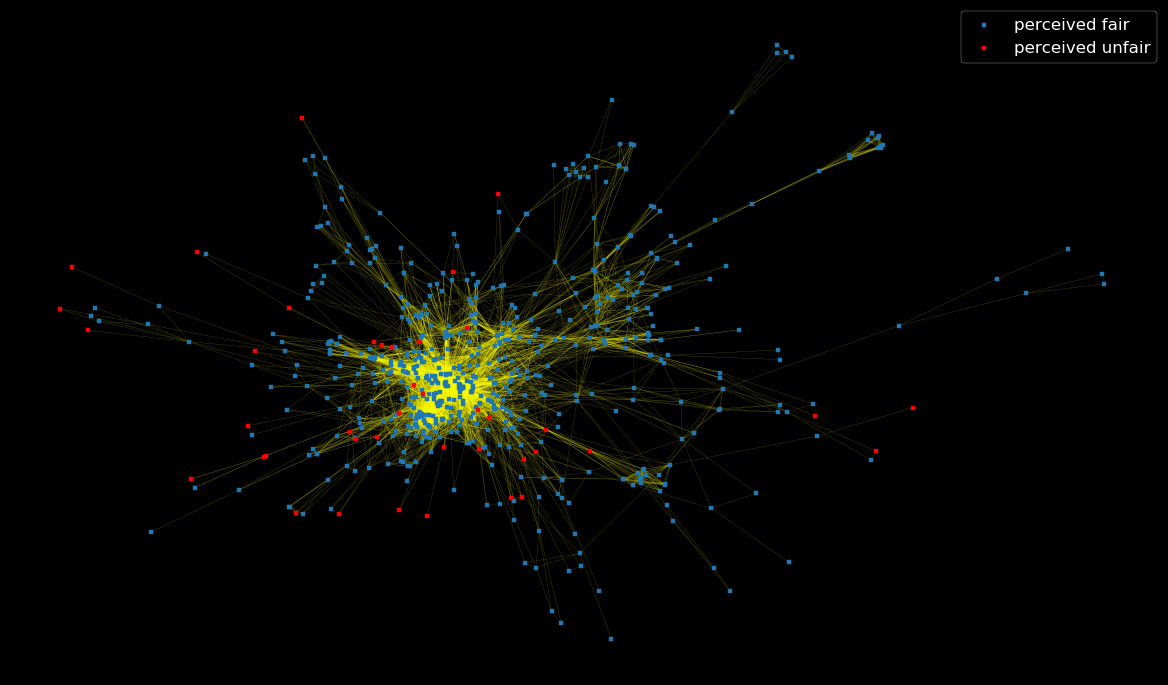

In [101]:
gc = next(nx.connected_components(g))
pf1 = set(np.where(perceptions(W ,y, h))[0])
pf0 = set(np.where(1-perceptions(W ,y, h))[0])
plt.style.use('dark_background')
fig = plt.figure(num=None, figsize=(50, 30), dpi=30)
fig.clf()

ax = fig.subplots()
ax.cla()
ax.axis('off')
nx.draw_networkx_nodes(g ,pos, nodelist=list(gc&pf1) ,node_shape='s', node_size=80, label ='perceived fair')
nx.draw_networkx_nodes(g ,pos, nodelist=list(gc&pf0),node_shape='s',node_color = 'r' ,node_size=80, label ='perceived unfair')
#nx.draw_networkx_edges(g ,pos, width= 0.4, alpha=0.4)
nx.draw_networkx_edges(g ,pos, width= 0.5, alpha=0.5, edge_color='yellow')
plt.legend(fontsize = 40)
plt.savefig('ICLR19_rec.png')
plt.show()

## 2018

#### Percpetion of original Conference Decisions

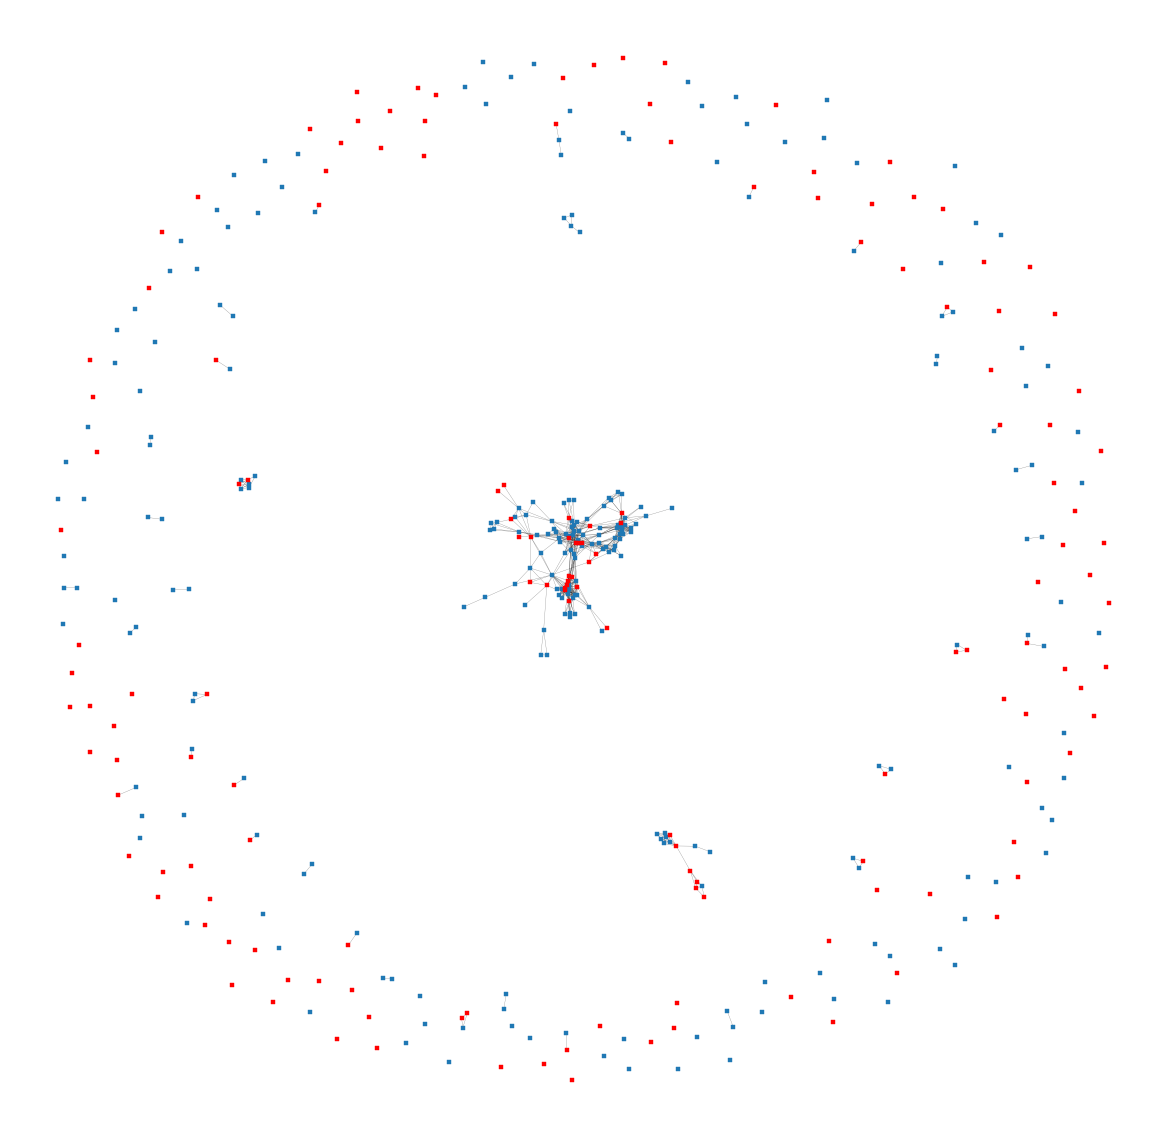

In [34]:
adj, y, h_c , prt_f, prt_t, W = load_data( year = 2018)
g = nx.from_numpy_array(adj)
pos = nx.spring_layout(g)

fig = plt.figure(num=None, figsize=(50, 50), dpi=30)
fig.clf()
ax = fig.subplots()
ax.cla()
ax.axis('off')
nx.draw_networkx_nodes(g ,pos, nodelist=list(np.where(perceptions(W ,y, h_c))[0]) ,node_shape='s', node_size=60)
nx.draw_networkx_nodes(g ,pos, nodelist=list(np.where(1-perceptions(W ,y, h_c))[0]),node_shape='s',node_color = 'r' ,node_size=60)
nx.draw_networkx_edges(g,pos, width= 0.7, alpha=0.5)
plt.show()

#### Percpetion of recommended Decisions

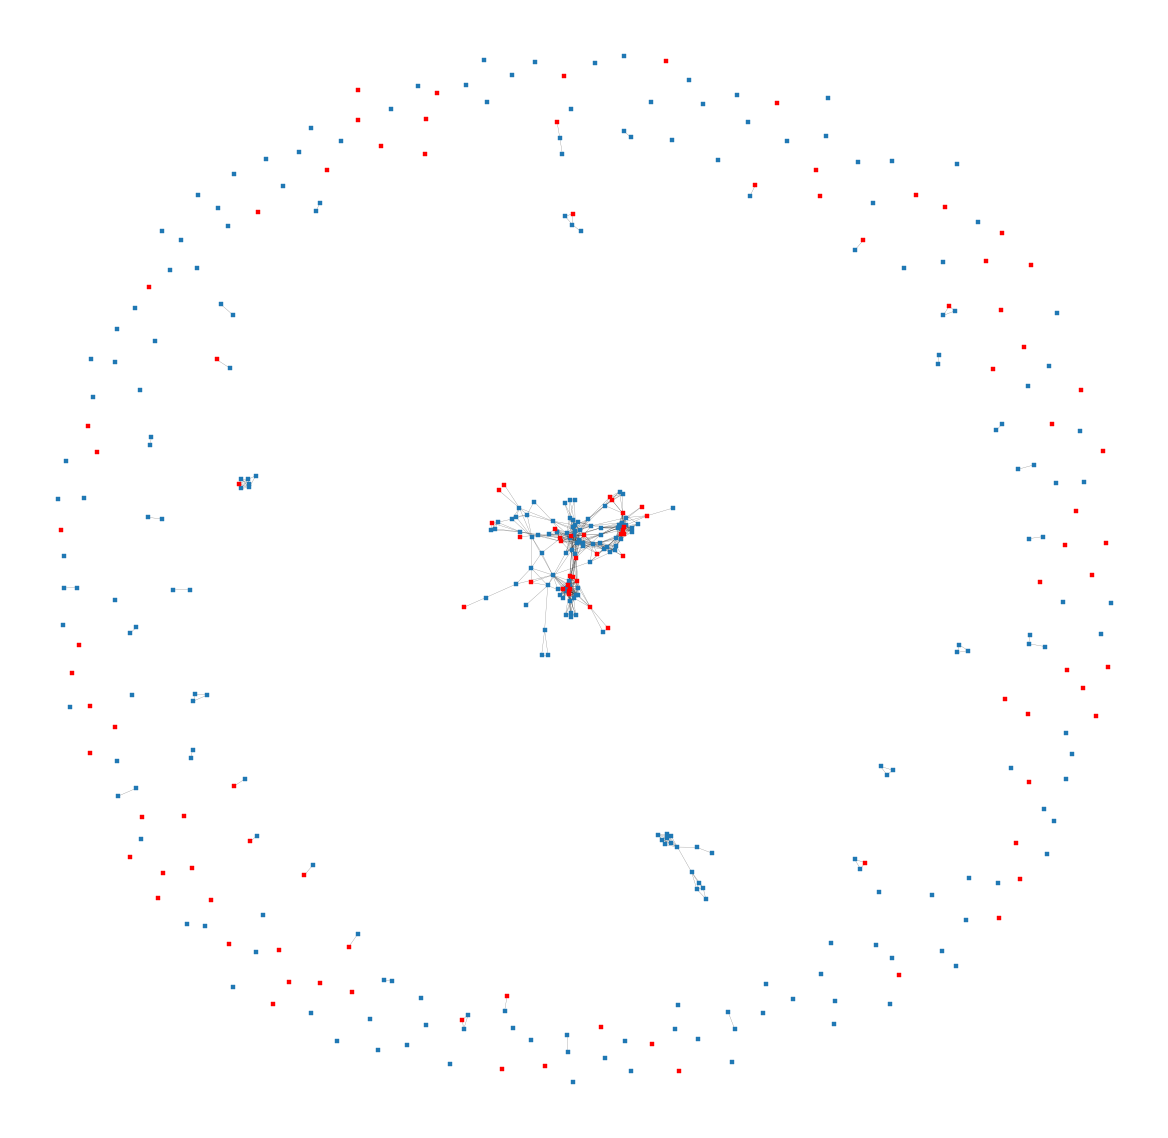

In [35]:
g = nx.from_numpy_array(adj)
#pos = nx.spring_layout(g)
h = tpr_parity_opt(W,y,h_c,prt_f)
fig = plt.figure(num=None, figsize=(50, 50), dpi=30)
fig.clf()
ax = fig.subplots()
ax.cla()
ax.axis('off')
nx.draw_networkx_nodes(g ,pos, nodelist=list(np.where(perceptions(W ,y, h))[0]) ,node_shape='s', node_size=60)
nx.draw_networkx_nodes(g ,pos, nodelist=list(np.where(1-perceptions(W ,y, h))[0]),node_shape='s',node_color = 'r' ,node_size=60)
nx.draw_networkx_edges(g,pos, width= 0.7, alpha=0.5)
plt.show()